In [1]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import *
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.basic_data import DatasetType
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

Can't import one of these: No module named 'pybullet_envs.envs'


In [2]:
show_doc(DuelingDQN.__init__)

<h4 id="DuelingDQN.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#DuelingDQN-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`data`**:`MDPDataBunch`, **`memory`**=***`None`***, **\*\*`kwargs`**)

<div class="collapse" id="DuelingDQN-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingDQN-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Replaces the basic action model with a DuelingDQNModule which splits the basic model into 2 streams. References:
    [1] Wang, Ziyu, et al. "Dueling network architectures for deep reinforcement learning."
    arXiv preprint arXiv:1511.06581 (2015).

Args:
    data: 

In [3]:
show_doc(DuelingDQNModule.forward)

<h4 id="DuelingDQNModule.forward" class="doc_header"><code>forward</code><a class="source_link" data-toggle="collapse" data-target="#DuelingDQNModule-forward-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>forward</code>(**`x`**)

<div class="collapse" id="DuelingDQNModule-forward-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#DuelingDQNModule-forward-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>forward</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Splits the base neural net output into 2 streams to evaluate the advantage and v of the s space and corresponding actions.

.. math::
   Q(s,a;\; \Theta, \\alpha, \\beta) = V(s;\; \Theta, \\beta) + A(s, a;\; \Theta, \\alpha) - \\frac{1}{|A|}
   \\Big\\sum_{a'} A(s, a';\; \Theta, \\alpha) 

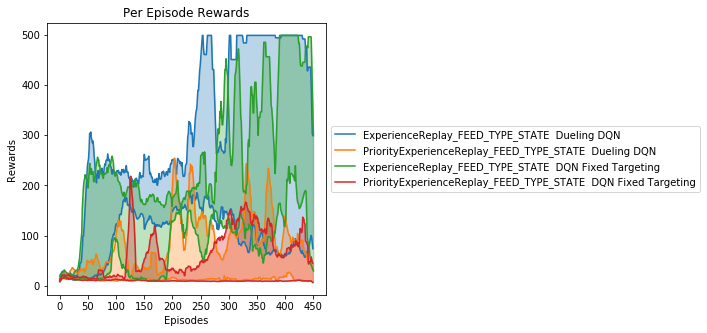

In [7]:
import os
model_dirs = ['data/cartpole_dueling dqn', 'data/cartpole_dqn fixed targeting']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

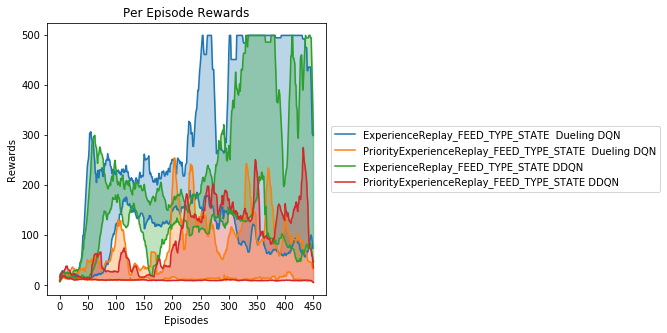

In [8]:
model_dirs = ['data/cartpole_dueling dqn', 'data/cartpole_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, smooth_groups=10)
group_interp.add_interpretation(group_interp_2)

In [5]:
group_interp.analysis

,name,average,max,min,type
0,"(DDQN, ExperienceReplay_FEED_TYPE_STATE, reward)",188.234590,499.0,9.1,reward
1,"(DDQN, ExperienceReplay_FEED_TYPE_STATE, reward)",220.743902,499.0,12.4,reward
2,"(DDQN, ExperienceReplay_FEED_TYPE_STATE, reward)",186.998891,499.0,9.5,reward
3,"(DDQN, ExperienceReplay_FEED_TYPE_STATE, reward)",152.903104,499.0,7.1,reward
4,"(DDQN, ExperienceReplay_FEED_TYPE_STATE, reward)",147.719512,499.0,9.2,reward
5,"(DDQN, PriorityExperienceReplay_FEED_TYPE_STAT...",57.051663,202.3,10.5,reward
6,"(DDQN, PriorityExperienceReplay_FEED_TYPE_STAT...",75.768736,198.0,10.3,reward
7,"(DDQN, PriorityExperienceReplay_FEED_TYPE_STAT...",56.496674,166.4,9.1,reward
8,"(DDQN, PriorityExperienceReplay_FEED_TYPE_STAT...",11.074058,26.8,5.8,reward
9,"(DDQN, PriorityExperienceReplay_FEED_TYPE_STAT...",36.042572,275.0,9.5,reward


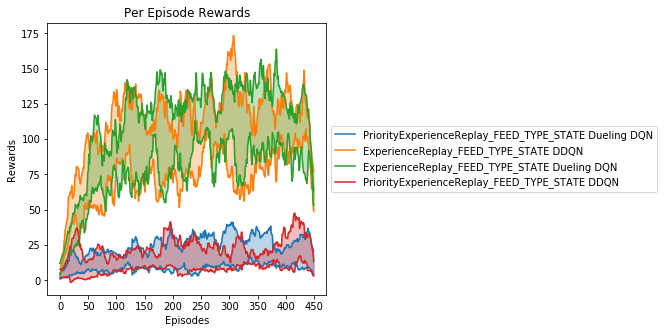

In [12]:
model_dirs = ['data/lunarlander_dueling dqn', 'data/lunarlander_ddqn']
group_interp_2 = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp_2.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp_2.plot_reward_bounds(per_episode=True, smooth_groups=20)
group_interp.add_interpretation(group_interp_2)